In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Load data
data = pd.read_parquet("Data/DSB_BDK_trainingset.parquet").reset_index()

In [70]:
# Interesting features
features_high = ['togpunktlighed', 'dsb_opformeringer', 'dsb_nedformeringer', 'dsb_open_errors_a', 'dsb_open_errors_b', 'dsb_open_errors_c', 'dsb_open_errors_d', 'dsb_antal_72_timer_foer', 'dsb_antal_i_alt','dsb_antal_paa_dagen', 'dsb_antal_uberoert', 'dsb_lkf_number_of_changes', 'dsb_event_count', 'dsb_0_1', 'dsb_tgf_sygdom', 'dsb_tgf_relative_sygdom', 'dsb_lkf_sygdom', 'dsb_lkf_relative_sygdom', 'dsb_fravaer', 'dsb_relative_fravaer']
features_low = ['togpunktlighed', 'dsb_tgf_number_of_changes', 'dsb_station_passengers_in', 'dsb_station_passengers_out']

In [123]:
def plotting_trends(col_name, check_seasonality=''):
    data_col = data.groupby('dato').mean().reset_index()[col_name]
    date = data['dato'].drop_duplicates()
    plt.plot(date, data_col, label=col_name)
    if check_seasonality:
            sin = data.groupby('dato').mean().reset_index()[check_seasonality]
            plt.plot(date, sin+np.mean(data_col), label=check_seasonality)
    plt.title(col_name)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

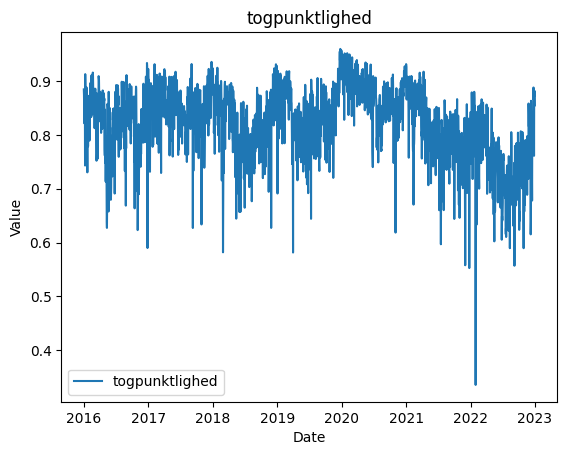

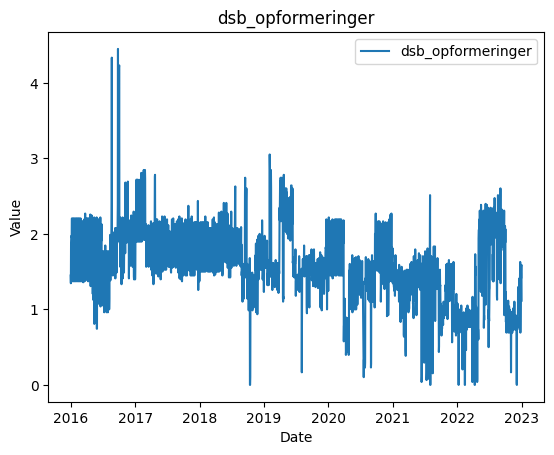

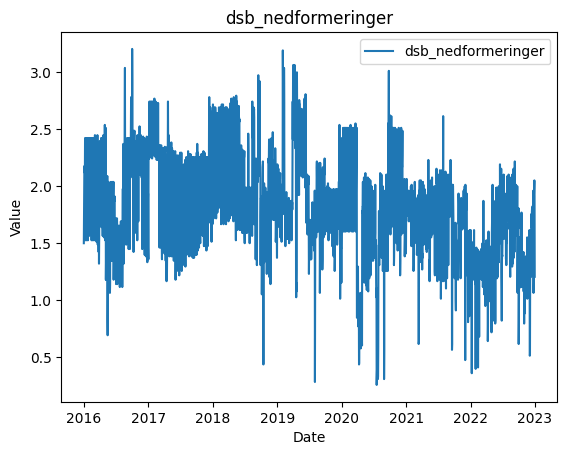

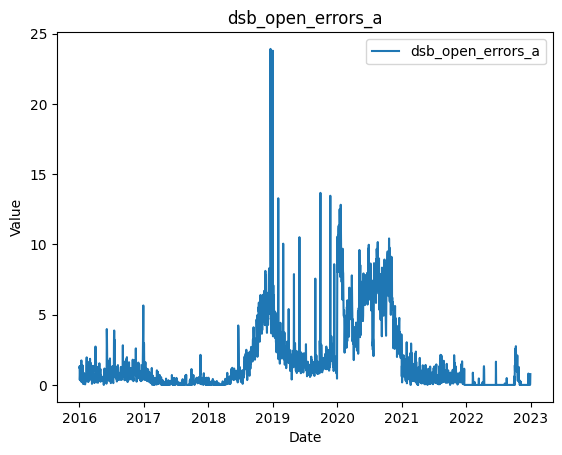

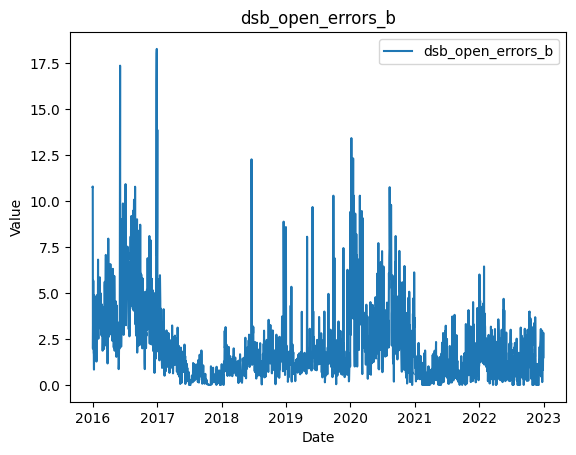

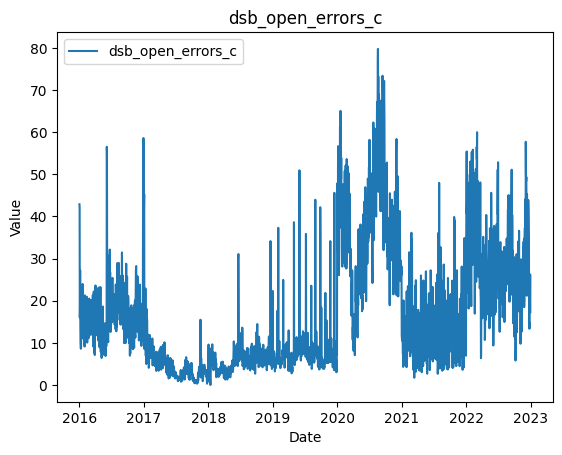

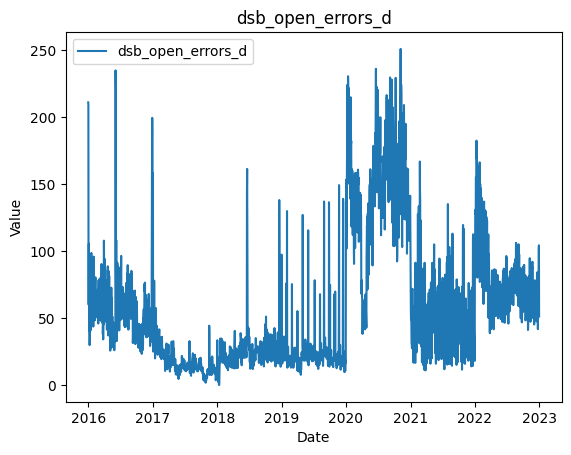

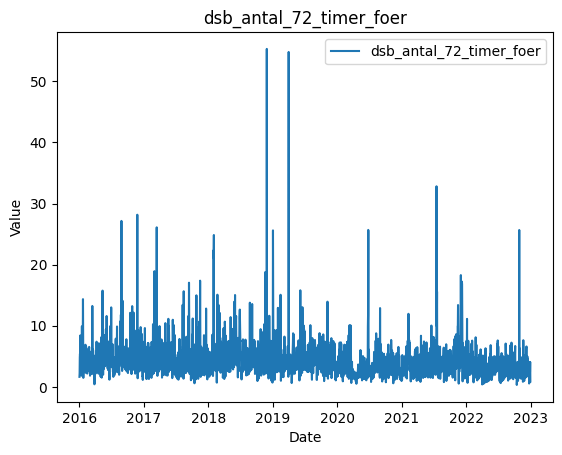

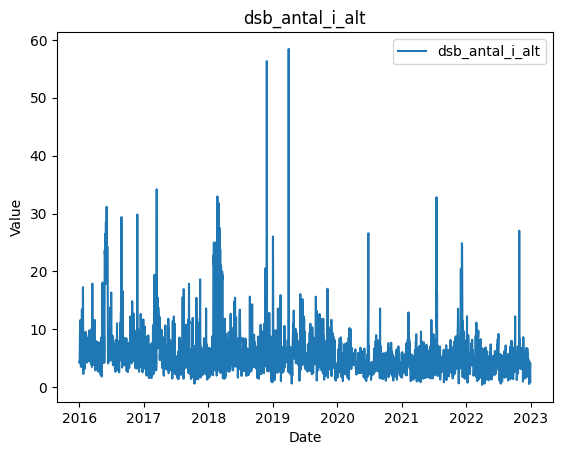

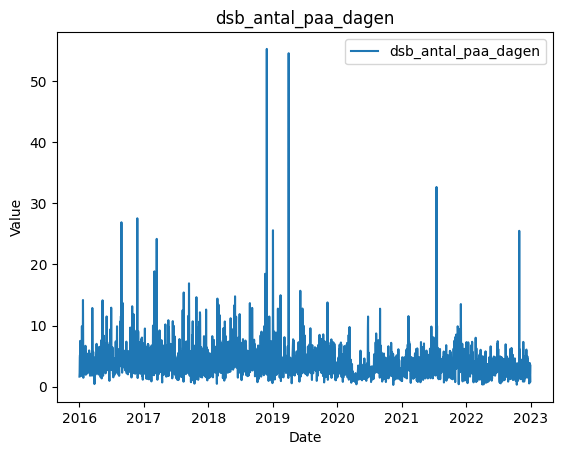

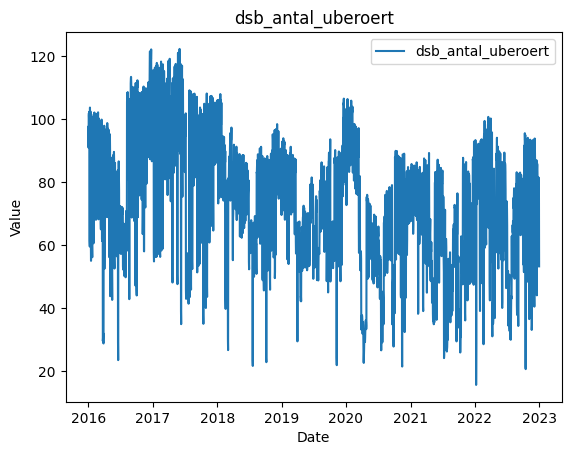

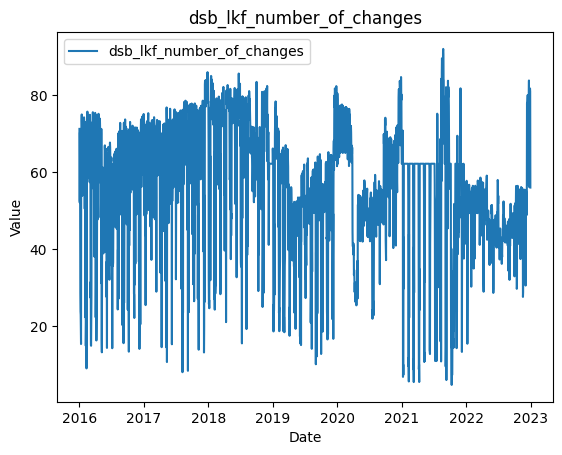

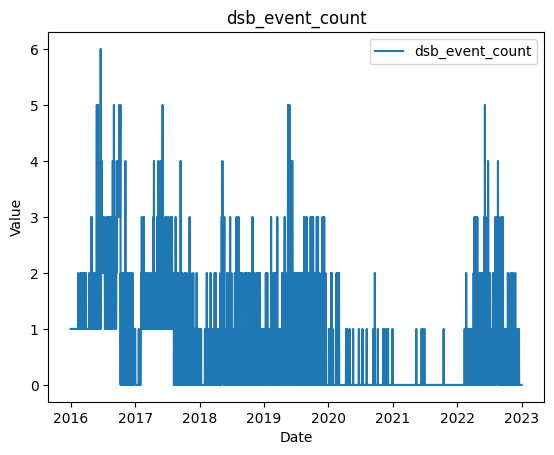

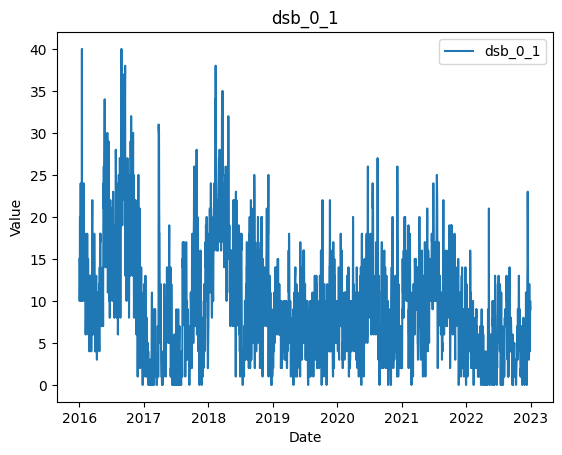

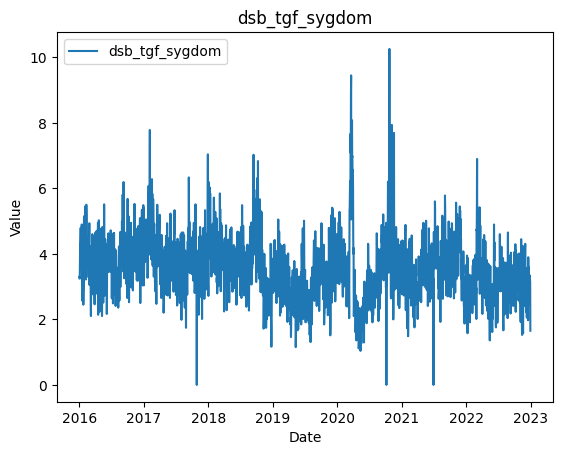

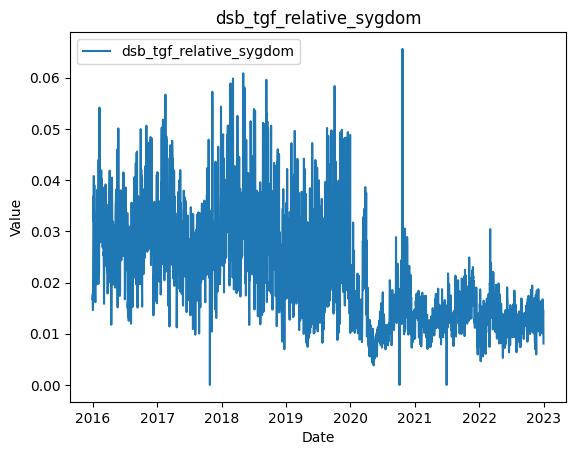

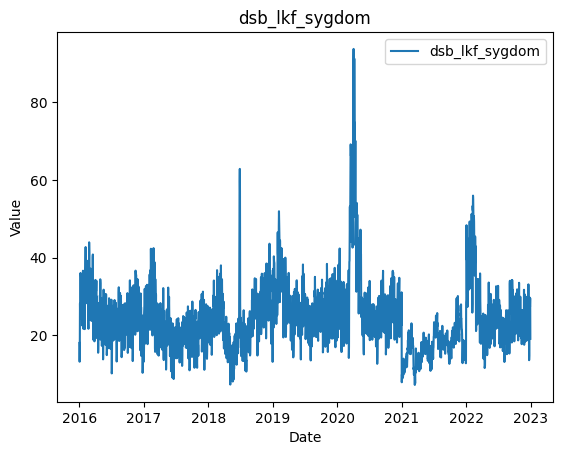

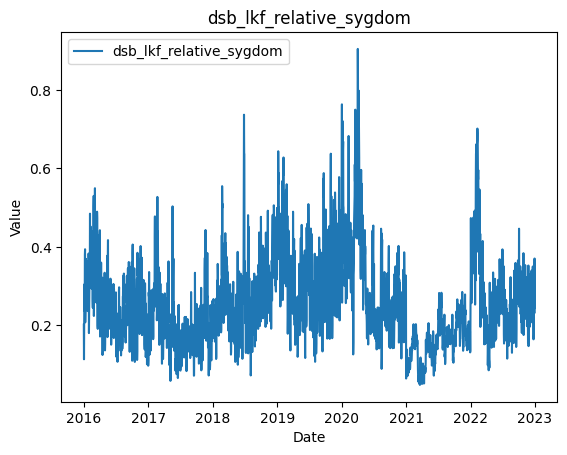

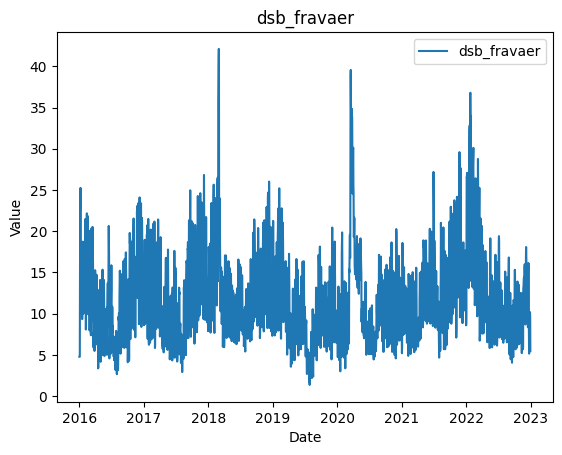

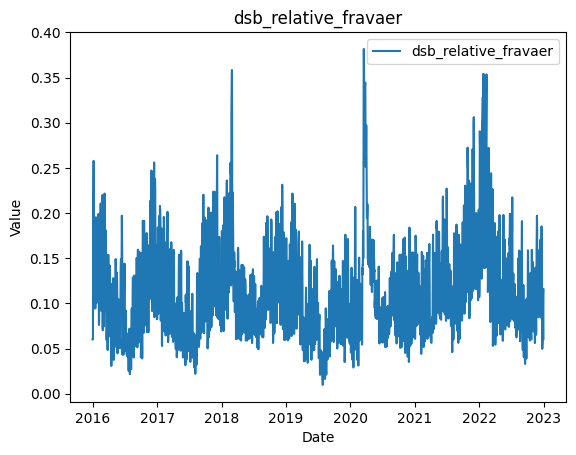

In [124]:
for feature in features_high:
    plotting_trends(feature) #check_seasonality='SEASON_COS' or 'SEASON_SIN'

In [125]:
features_high_data = data[features_high]

In [126]:
correlation_df = features_high_data.corr()

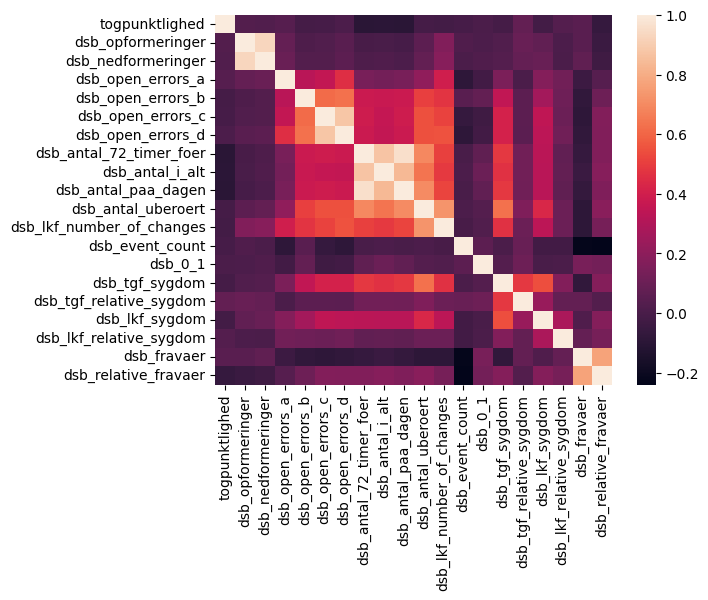

In [127]:
sns.heatmap(correlation_df, annot = False)
plt.show()

<Axes: >

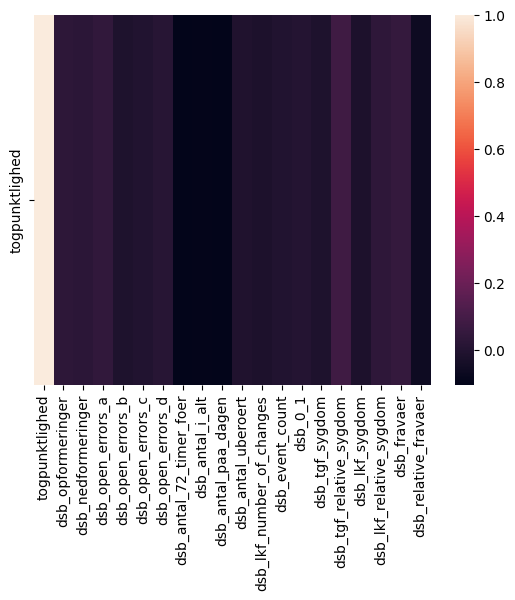

In [128]:
sns.heatmap(correlation_df.loc[['togpunktlighed'],:], annot = False)

array([[<Axes: xlabel='togpunktlighed', ylabel='togpunktlighed'>,
        <Axes: xlabel='dsb_opformeringer', ylabel='togpunktlighed'>,
        <Axes: xlabel='dsb_nedformeringer', ylabel='togpunktlighed'>,
        <Axes: xlabel='dsb_open_errors_a', ylabel='togpunktlighed'>,
        <Axes: xlabel='dsb_open_errors_b', ylabel='togpunktlighed'>,
        <Axes: xlabel='dsb_open_errors_c', ylabel='togpunktlighed'>,
        <Axes: xlabel='dsb_open_errors_d', ylabel='togpunktlighed'>,
        <Axes: xlabel='dsb_antal_72_timer_foer', ylabel='togpunktlighed'>,
        <Axes: xlabel='dsb_antal_i_alt', ylabel='togpunktlighed'>,
        <Axes: xlabel='dsb_antal_paa_dagen', ylabel='togpunktlighed'>,
        <Axes: xlabel='dsb_antal_uberoert', ylabel='togpunktlighed'>,
        <Axes: xlabel='dsb_lkf_number_of_changes', ylabel='togpunktlighed'>,
        <Axes: xlabel='dsb_event_count', ylabel='togpunktlighed'>,
        <Axes: xlabel='dsb_0_1', ylabel='togpunktlighed'>,
        <Axes: xlabel='dsb_tgf_sy

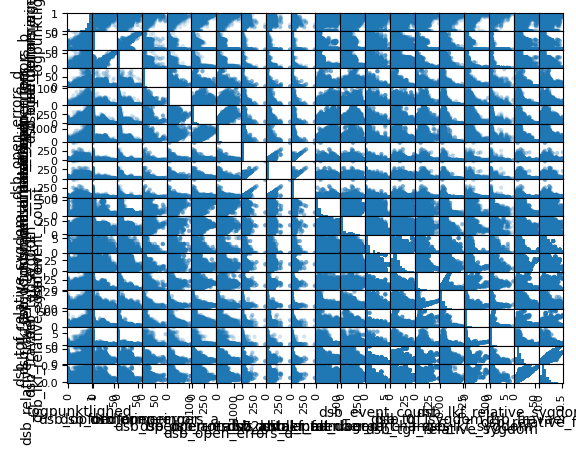

In [130]:
# Pair plots / scatter matrix
pd.plotting.scatter_matrix(features_high_data, alpha=0.2)